# Modeling

The idea will be to split the data into train and test and see if we can predict the closure of a restaurant based on the attributes. 

In [7]:
#Import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score  
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC, LinearSVC

from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix, accuracy_score

In [8]:
data = pd.read_csv('data.csv')

In [9]:
data.describe()

,Unnamed: 0,attributes.Ambience.divey,attributes.Dietary Restrictions.vegan,attributes.Happy Hour,attributes.Order at Counter,attributes.Outdoor Seating,attributes.Alcohol,attributes.Ambience.classy,attributes.Parking.lot,attributes.Ambience.touristy,...,attributes.Ambience.intimate,attributes.Good For.latenight,attributes.Good For.dinner,attributes.Good for Kids,attributes.Parking.validated,attributes.Has TV,attributes.Ambience.casual,attributes.Good For Groups,attributes.Ambience.romantic,attributes.Ambience.upscale
count,18325.000000,18325.000000,18325.000000,18325.000000,18325.000000,18325.000000,18325.000000,18325.000000,18325.000000,18325.000000,...,18325.000000,18325.000000,18325.000000,18325.000000,18325.000000,18325.000000,18325.000000,18325.000000,18325.000000,18325.000000
mean,9162.000000,0.020518,0.003383,0.057080,0.011241,0.327585,0.536426,0.015007,0.539482,0.005184,...,0.005948,0.036344,0.397435,0.809986,0.003547,0.462156,0.502483,0.847749,0.009277,0.007040
std,5290.116177,0.141769,0.058070,0.232003,0.105431,0.469345,0.498685,0.121583,0.498452,0.071816,...,0.076897,0.187149,0.489381,0.392322,0.059453,0.498579,0.500007,0.359274,0.095872,0.083609
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4581.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,9162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,13743.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,18324.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
#Shuffle dataset

data = data.sample(frac=1, random_state=25).reset_index(drop=True)

In [14]:
#preprocessing & split data into y, X and then into train and test.
def preprocess_inputs(dataframe):
    #Split y, X
    y= dataframe['open']
    X=dataframe.drop('open', axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7, shuffle=True, random_state=25)
    return X_train, X_test, y_train, y_test

In [15]:
X_train, X_test, y_train, y_test = preprocess_inputs(data)

In [16]:
y_train.value_counts()

1    10358
0     2469
Name: open, dtype: int64

In [17]:
y_test.value_counts()

1    4453
0    1045
Name: open, dtype: int64

#### Logistic Regression

In [18]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

y_pred_logistic = logistic_model.decision_function(X_test)
    
print("Logistic Regression:" + " {:.2f}%".format(logistic_model.score(X_test, y_test)*100))


Logistic Regression: 80.99%


In [19]:
print("Coefficients: \n", logistic_model.coef_)

Coefficients: 
 [[ 2.65892084e-05  4.15953738e-03 -2.12000393e-04 -1.39435160e-03
  -2.99978803e-05 -8.72191532e-03 -6.98830735e-03 -1.14573143e-03
   2.68798860e-02  6.05929134e-04  2.91133421e-03 -2.78229063e-02
   1.73681871e-02 -5.64920418e-04 -1.58339423e-03 -1.33362299e-02
   3.16030637e-02  5.02347237e-02  5.93196137e-03 -5.16761970e-03
  -3.83513080e-04  7.10356167e-03  3.27943949e-02 -4.64756509e-03
   3.19239297e-02 -8.72453034e-04 -1.81379718e-02 -1.58902949e-02
   2.64824992e-02  1.01978955e-02  4.62914219e-02  1.78272193e-01
   1.58569418e-02 -9.08916081e-04 -4.66621534e-04  1.01842486e-03
   6.83894609e-02 -1.21872787e-03  1.58918209e-02  6.32157852e-03
   4.23784294e-02 -7.67604202e-04 -1.17377012e-03]]


In [20]:
logistic_model.get_params(deep=True)

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

#### K-Nearest Neigbors

In [21]:
KNN_model = KNeighborsClassifier()
KNN_model.fit(X_train, y_train)

y_pred_KNN = KNN_model.predict_proba(X_test)
    
print("K-Nearest Neighbors:" + " {:.2f}%".format(KNN_model.score(X_test, y_test)*100))


K-Nearest Neighbors: 79.23%


#### Decision Tree

In [22]:
Tree_model = DecisionTreeClassifier()
Tree_model.fit(X_train, y_train)

y_pred_tree = Tree_model.predict(X_test)
    
print("Decision Tree:" + " {:.2f}%".format(Tree_model.score(X_test, y_test)*100))

Decision Tree: 75.54%


In [23]:
print(confusion_matrix(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

[[ 395  650]
 [ 695 3758]]
              precision    recall  f1-score   support

           0       0.36      0.38      0.37      1045
           1       0.85      0.84      0.85      4453

    accuracy                           0.76      5498
   macro avg       0.61      0.61      0.61      5498
weighted avg       0.76      0.76      0.76      5498



#### Support Vector Machine (Linear Kernel)

In [24]:
SVM_model = LinearSVC()
SVM_model.fit(X_train, y_train)

y_pred_SVM = SVM_model.decision_function(X_test)
    
print("Support Vector Machine (Linear Kernel):" + " {:.2f}%".format(SVM_model.score(X_test, y_test)*100))


Support Vector Machine (Linear Kernel): 80.14%


C:\Users\ziggy\anaconda3\envs\Springboard\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


#### Support Vector MAchine (RBF Kernel)

In [26]:
SVC_model = SVC()
SVC_model.fit(X_train, y_train)

y_pred_SVC = SVC_model.decision_function(X_test)
    
print("Support Vector Machine (RBF Kernel):" + " {:.2f}%".format(SVC_model.score(X_test, y_test)*100))

Support Vector Machine (RBF Kernel): 80.99%


#### Neural Network

In [27]:
Neural_model = MLPClassifier()
Neural_model.fit(X_train, y_train)


  
print("Neural Network:" + " {:.2f}%".format(Neural_model.score(X_test, y_test)*100))

Neural Network: 25.03%


#### Random Forest

In [28]:
Forest_model = RandomForestClassifier()
Forest_model.fit(X_train, y_train)

y_pred_forest = Forest_model.predict(X_test)
    
print("Random Forest:" + " {:.2f}%".format(Forest_model.score(X_test, y_test)*100))

Random Forest: 83.45%


#### Gradient Boosting

In [30]:
Gradient_model = GradientBoostingClassifier()
Gradient_model.fit(X_train, y_train)

#y_pred_Neural = Neural_model.decision_function(X_test)
    
print("Gradient Boosting:" + " {:.2f}%".format(Gradient_model.score(X_test, y_test)*100))

Gradient Boosting: 83.47%


#### ROC curve 

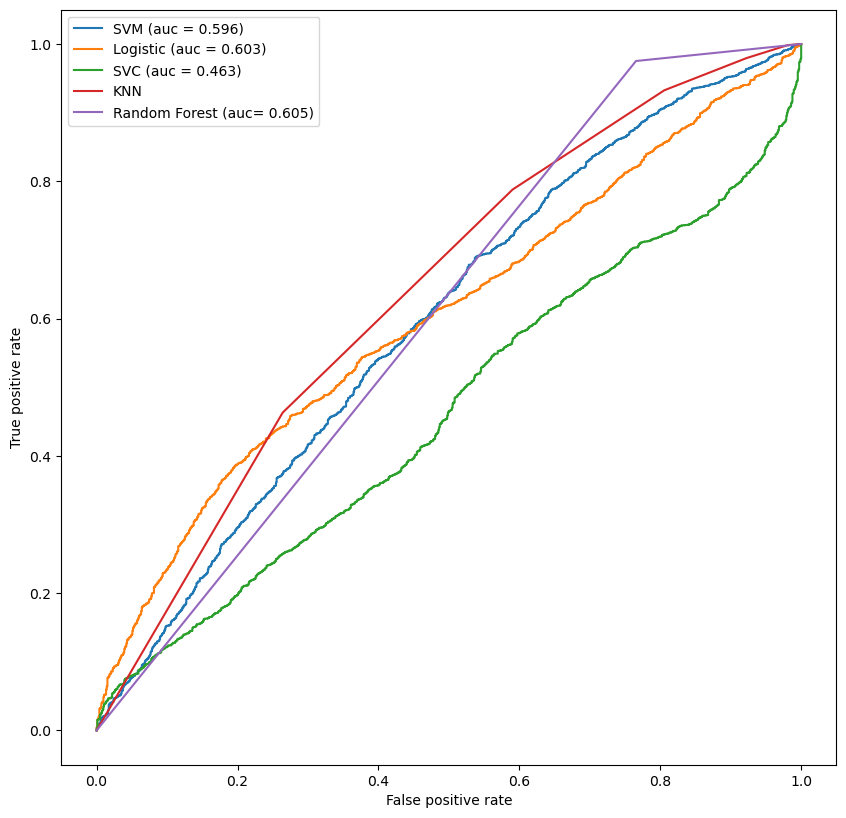

In [33]:
#ROC curve for Logistic, KNN, SVMs

logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, y_pred_logistic)
auc_logistic = auc(logistic_fpr, logistic_tpr)

knn_fpr, knn_tpr, threshold = roc_curve(y_test, y_pred_KNN[:,1])

svm_fpr, svm_tpr, threshold = roc_curve(y_test, y_pred_SVM)
auc_svm = auc(svm_fpr, svm_tpr)

svc_fpr, svc_tpr, threshold = roc_curve(y_test, y_pred_SVC)
auc_svc = auc(svc_fpr, svc_tpr)

forest_fpr, forest_tpr, threshold = roc_curve(y_test, y_pred_forest)
auc_forest = auc(forest_fpr, forest_tpr)

plt.figure(figsize=(10,10), dpi=100)
plt.plot(svm_fpr, svm_tpr, linestyle='-', label="SVM (auc = %0.3f)" % auc_svm)
plt.plot(logistic_fpr, logistic_tpr, linestyle='-', label="Logistic (auc = %0.3f)" % auc_logistic)
plt.plot(svc_fpr, svc_tpr, linestyle='-', label="SVC (auc = %0.3f)" % auc_svc)
plt.plot(knn_fpr, knn_tpr, linestyle='-', label="KNN")
plt.plot(forest_fpr, forest_tpr,linestyle='-', label="Random Forest (auc= %0.3f)" % auc_forest)

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()
